In [1]:
import mrcfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src.projection as projection
import os

In [2]:
# Load the electron density map file
with mrcfile.open('emd_0024.map') as mrc:
    map_data = mrc.data
print(map_data.shape)

(224, 224, 224)


[[[ 0.04077783 -0.00369098 -0.00601552]
  [ 0.09485042  0.04632829  0.03911668]
  [ 0.13122085  0.10503383  0.10393727]]

 [[ 0.02403603 -0.06178169 -0.09010556]
  [ 0.08570535 -0.00518311 -0.03881611]
  [ 0.13832101  0.07650518  0.05712312]]

 [[ 0.04637299 -0.01488    -0.04631327]
  [ 0.12012565  0.04950902  0.00727904]
  [ 0.16991083  0.11600708  0.08344746]]]
[[[ 1585.1577   -143.322    -233.67558]
  [ 3686.9312   1800.901    1520.5897 ]
  [ 5100.631    4082.755    4040.132  ]]

 [[  934.4125  -2401.2776  -3502.2114 ]
  [ 3331.4668   -201.32014 -1508.6173 ]
  [ 5376.6104   2973.861    2220.4907 ]]

 [[ 1802.6387   -578.23315 -1800.0281 ]
  [ 4669.366    1924.5344    283.07724]
  [ 6604.49     4509.2793   3243.7039 ]]]


In [7]:
norm = projection.normalize_edm(map_data)
pdr = projection.point_density_representation(norm)

[[-0.17679334  0.10048445  0.9791052 ]
 [-0.85868903 -0.50192935 -0.10353781]
 [ 0.48103769 -0.85905169  0.17502266]]


[[-0.17679334  0.10048445  0.9791052 ]
 [-0.85868903 -0.50192935 -0.10353781]
 [ 0.48103769 -0.85905169  0.17502266]]
[[ 0.38928423 -0.72314661 -0.57054077]
 [ 0.24181428 -0.51744407  0.82083951]
 [-0.88881024 -0.45750478 -0.02656564]]
[[ 0.31059239  0.61678518 -0.72326234]
 [ 0.92454311 -0.01927729  0.38058957]
 [ 0.22079947 -0.78689544 -0.57623186]]
[[-0.62832567 -0.59631057  0.49962041]
 [-0.42592928 -0.27372969 -0.86235509]
 [ 0.6509924  -0.7546428  -0.08199474]]
[[-0.915621    0.38741854  0.10744792]
 [ 0.12739036  0.02608456  0.9915096 ]
 [ 0.38132647  0.92153485 -0.07323696]]
[[ 0.04830421 -0.1345506   0.98972867]
 [-0.95176463  0.29439175  0.08647301]
 [-0.30300295 -0.94616576 -0.11384014]]
[[ 0.70288815  0.55590744  0.44375125]
 [ 0.41125895  0.19140009 -0.89119699]
 [-0.58035707  0.80890848 -0.09408905]]
[[ 0.4285634   0.86505508  0.26079323]
 [-0.85852869  0.47983526 -0.18079438]
 [-0.28153489 -0.14641661  0.94831444]]
[[ 0.50074212 -0.81066509  0.30344594]
 [ 0.68146798  0.

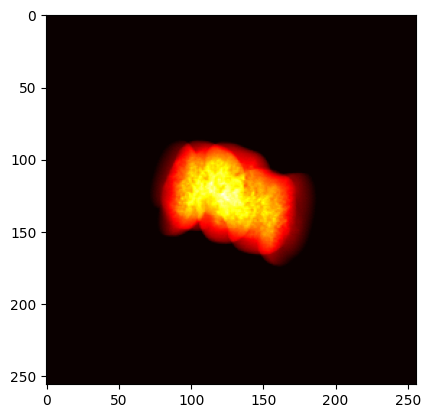

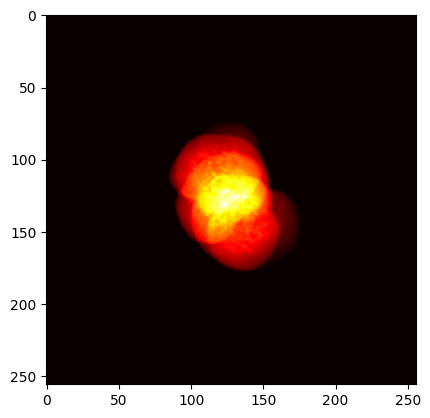

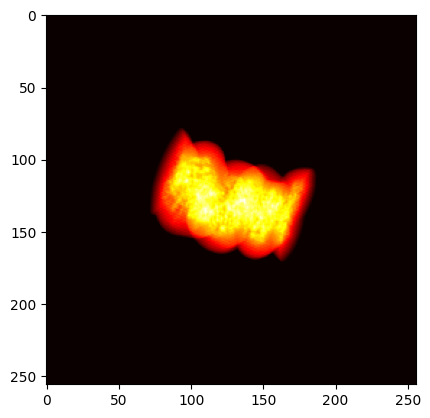

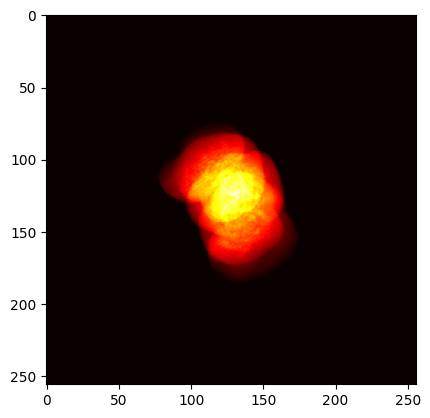

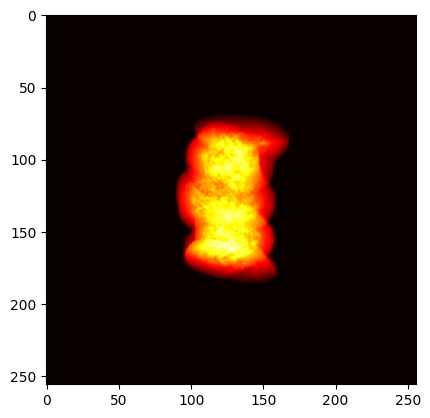

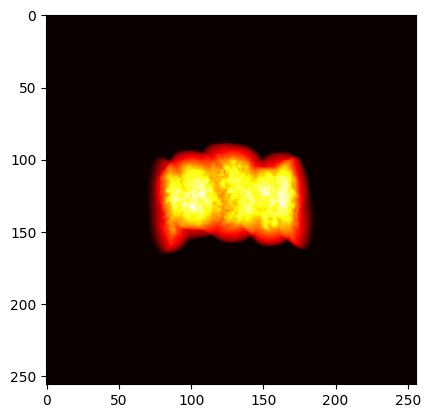

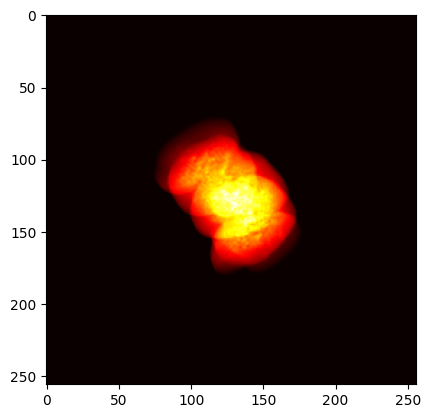

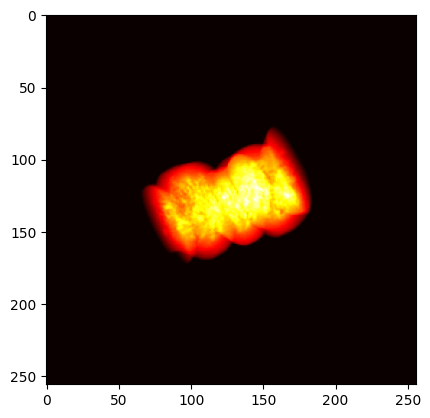

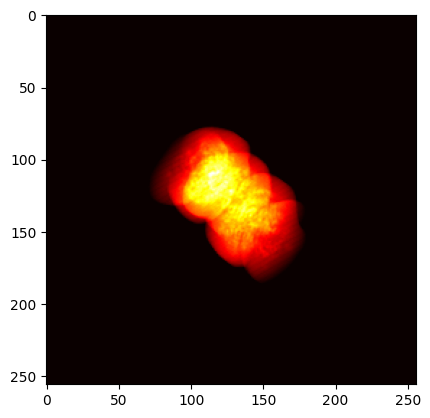

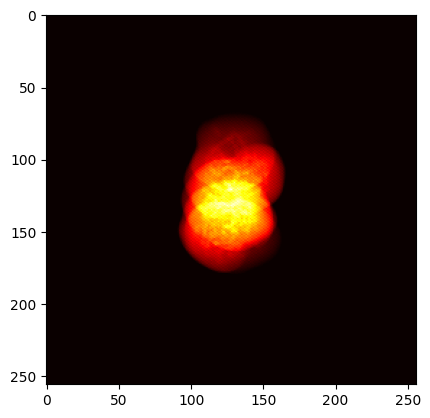

In [10]:
# print(map_data[0:3,110:113,110:113])
# print(norm[0:3,110:113,110:113])
proj = projection.random_projection(pdr, batch_size=10)
for p in proj:
    projection.visualize_projection(p)

In [3]:
pdr = projection.point_density_representation(map_data)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\devch\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\devch\AppData\Local\Temp\ipykernel_33264\2951856529.py", line 1, in <module>
    pdr = projection.point_density_representation(map_data)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\devch\Documents\6.S966\project\cryo_reconstruction\src\projection.py", line -1, in point_density_representation
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\devch\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\devch\AppData\Roaming\Python\Python311\site-packages\IPython\core

In [5]:
proj = projection.random_projection(pdr, distance_weighting=True, batch_size=2)
print(len(proj))
print(proj[0].shape)

[[-0.17679334  0.10048445  0.9791052 ]
 [-0.85868903 -0.50192935 -0.10353781]
 [ 0.48103769 -0.85905169  0.17502266]]
[[ 0.38928423 -0.72314661 -0.57054077]
 [ 0.24181428 -0.51744407  0.82083951]
 [-0.88881024 -0.45750478 -0.02656564]]
2
(256, 256)


In [5]:
xy = np.mean(map_data, axis=2)
print(xy.shape)

(224, 224)


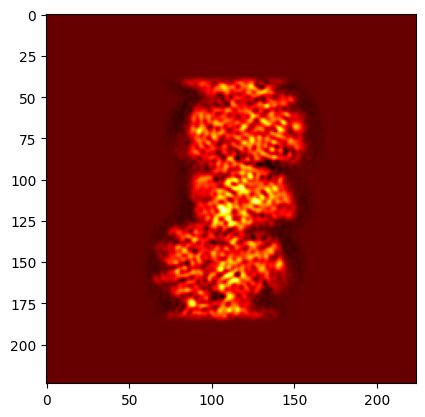

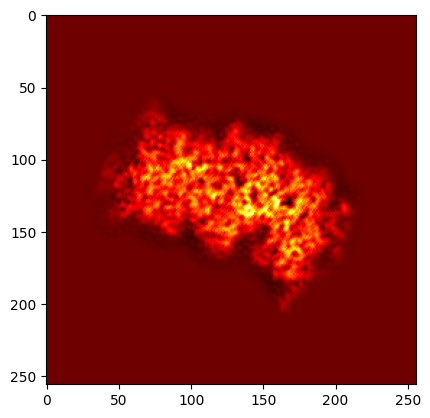

In [6]:
plt.imshow(xy, cmap='hot')
plt.show()
plt.imshow(proj, cmap='hot')
plt.show()